# Casamentos Homoafetivos do Brasil
Inicialmente será feito uma análise dos dados, com o <b>objetivo de encontrar insights</b> que nos fornecerão informações importantes <b>sobre gênero, estado e ano dos casamentos homoafetivos do Brasil.</b>

Após isso, será construído um <b>modelo de aprendizado de máquina</b> para realizar a <b>previsão</b> de casamentos homoafetivos para os próximos 2 anos nos 3 estados com maior número de casamentos no último ano.

### Importando as bibliotecas

In [1]:
# Manipulação dos dados e visualização
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Juntando as tabelas

Como as tabelas dos anos e gênero estão separadas, decidi juntar todas as tabelas em um dataframe único para realizar os tratamentos e análise dos dados

## 1.1 Dataframe masculino

Nessa etapa, junto todas as tabelas do sexo masculino

In [2]:
df_masc_2015 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2015.csv')
df_masc_2016 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2016.csv')
df_masc_2017 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2017.csv')
df_masc_2018 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2018.csv')
df_masc_2019 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xlsx_2019.csv')
df_masc_2020 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2020.csv')
df_masc_2021 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.3.xls_2021.csv')

In [3]:
df_masc = pd.concat([df_masc_2015, 
                     df_masc_2016, 
                     df_masc_2017, 
                     df_masc_2018, 
                     df_masc_2019, 
                     df_masc_2020, 
                     df_masc_2021], ignore_index=True)

## 1.2 Dataframe feminino

Nessa etapa, junto todas as tabelas do sexo feminino

In [3]:
df_fem_2015 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2015.csv')
df_fem_2016 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2016.csv')
df_fem_2017 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2017.csv')
df_fem_2018 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2018.csv')
df_fem_2019 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xlsx_2019.csv')
df_fem_2020 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2020.csv')
df_fem_2021 = pd.read_csv('./PSEL Data Science 2024/dados_Tabela 4.1.4.xls_2021.csv')

In [6]:
df_fem = pd.concat([df_fem_2015, 
                     df_fem_2016, 
                     df_fem_2017, 
                     df_fem_2018, 
                     df_fem_2019, 
                     df_fem_2020, 
                     df_fem_2021], ignore_index=True)

## 1.3 Dataframe Final

As etapas anteriores resultaram em 2 dataframes um referente ao sexo masculino e outro referente ao feminino. Agora, vou juntar esses dataframes em um único dataframe, ordenados por ano de forma crescente

In [7]:
df = (pd.concat([df_masc, df_fem], ignore_index=True)).sort_values(by='ano')
df = df.reset_index(drop=True)

In [8]:
df

,ano,uf,genero,mes,numero
0,2015,Acre,Masculino,Abril,0
1,2015,Acre,Masculino,Março,0
2,2015,Acre,Masculino,Fevereiro,0
3,2015,Acre,Masculino,Janeiro,0
4,2015,Rondônia,Masculino,Dezembro,1
...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3
4532,2021,Rondônia,Masculino,Abril,1
4533,2021,Rondônia,Masculino,Março,1
4534,2021,Rondônia,Masculino,Fevereiro,0


Salva o dataframe em formato .csv para ser utilizado nas próximas etapas

In [9]:
df.to_csv('data_concat.csv', index=False)

#  2. Limpeza e Organização dos Dados

In [4]:
df = pd.read_csv('data_concat.csv')

## 2.1 Informações sobre o Banco de Dados

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4536 entries, 0 to 4535
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ano     4536 non-null   int64 
 1   uf      4536 non-null   object
 2   genero  4536 non-null   object
 3   mes     4536 non-null   object
 4   numero  4536 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 177.3+ KB


## 2.2 Identificação de Dados Duplicados

In [22]:
df.loc[df.duplicated()]

,ano,uf,genero,mes,numero,Região


Não há dados duplicado, então não foi preciso realizar nenhuma ação

## 2.3 Identificação de Dados Nulos

In [14]:
df.isnull().sum()

ano       0
uf        0
genero    0
mes       0
numero    0
dtype: int64

Como não há dados invalidos, nenhuma ação foi realizada

## 2.4 Adicionando Região ao dataframe

Nessa etapa, foi adicionado a coluna de região ao dataframe para uma análise mais aprofundada, onde pode-se tirar insights importantes

In [15]:
uf_region = {
    'Acre': 'Norte',
    'Amapá': 'Norte',
    'Amazonas': 'Norte',
    'Pará': 'Norte',
    'Rondônia': 'Norte',
    'Roraima': 'Norte',
    'Tocantins': 'Norte',
    'Alagoas': 'Nordeste',
    'Bahia': 'Nordeste',
    'Ceará': 'Nordeste',
    'Maranhão': 'Nordeste',
    'Paraíba': 'Nordeste',
    'Pernambuco': 'Nordeste',
    'Piauí': 'Nordeste',
    'Rio Grande do Norte': 'Nordeste',
    'Sergipe': 'Nordeste',
    'Distrito Federal': 'Centro-Oeste',
    'Goiás': 'Centro-Oeste',
    'Mato Grosso': 'Centro-Oeste',
    'Mato Grosso do Sul': 'Centro-Oeste',
    'Espírito Santo': 'Sudeste',
    'Minas Gerais': 'Sudeste',
    'Rio de Janeiro': 'Sudeste',
    'São Paulo': 'Sudeste',
    'Paraná': 'Sul',
    'Rio Grande do Sul': 'Sul',
    'Santa Catarina': 'Sul'
}

df['Região'] = df['uf'].map(uf_region)

In [16]:
df

,ano,uf,genero,mes,numero,Região
0,2015,Acre,Masculino,Abril,0,Norte
1,2015,Acre,Masculino,Março,0,Norte
2,2015,Acre,Masculino,Fevereiro,0,Norte
3,2015,Acre,Masculino,Janeiro,0,Norte
4,2015,Rondônia,Masculino,Dezembro,1,Norte
...,...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3,Norte
4532,2021,Rondônia,Masculino,Abril,1,Norte
4533,2021,Rondônia,Masculino,Março,1,Norte
4534,2021,Rondônia,Masculino,Fevereiro,0,Norte


In [25]:
df.nunique()

ano         7
uf         27
genero      2
mes        12
numero    152
Região      5
dtype: int64

Todos os valores <b>fazem sentido</b>, podemos seguir para salvar o dataframe final para começar as análises

In [17]:
df.to_csv('data_final.csv', index=False)

# 3: Análise dos Dados

In [7]:
df = pd.read_csv('data_final.csv')
df

,ano,uf,genero,mes,numero,Região
0,2015,Acre,Masculino,Abril,0,Norte
1,2015,Acre,Masculino,Março,0,Norte
2,2015,Acre,Masculino,Fevereiro,0,Norte
3,2015,Acre,Masculino,Janeiro,0,Norte
4,2015,Rondônia,Masculino,Dezembro,1,Norte
...,...,...,...,...,...,...
4531,2021,Rondônia,Masculino,Maio,3,Norte
4532,2021,Rondônia,Masculino,Abril,1,Norte
4533,2021,Rondônia,Masculino,Março,1,Norte
4534,2021,Rondônia,Masculino,Fevereiro,0,Norte


### Analisando algumas métricas estatísticas

In [8]:
df['numero'].describe() 
#Só foi escolhido a coluna "número", pois é a única que faz sentido para essas análises

count    4536.000000
mean       11.257937
std        27.886390
min         0.000000
25%         1.000000
50%         4.000000
75%        11.000000
max       827.000000
Name: numero, dtype: float64

Alguns Insights:
1. A média de casamentos de 2015 a 2021, considerando todos os gêneros é aproximadamente 11. 

2. Observando o valor máximo, podemos identificar um valor (827 casamento no estado) que difere significativamente dos outros valores, portanto será necessário verificar os outliers.

3. É possível verificar um desvio-padrão relativamente grande, tendo uma alta dispersão. Mostrando que uma análise aprodundada de 2015-2021 não seja tão interessante, sendo melhor verificar um ano específico.

### Verificando Outliers

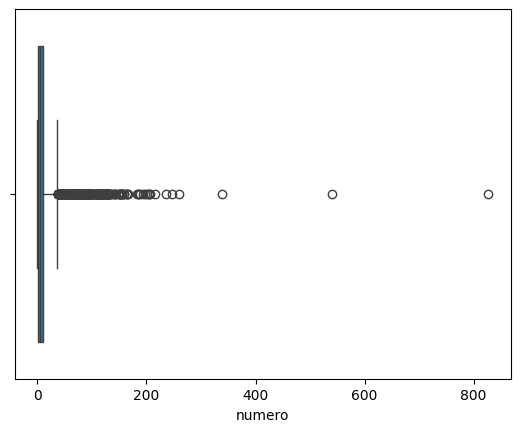

In [20]:
sns.boxplot(x=df['numero'])
plt.show()

C:\Users\jeisi\AppData\Local\Temp\ipykernel_17176\4253759900.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['ano'], y=df['numero'], palette='rainbow')


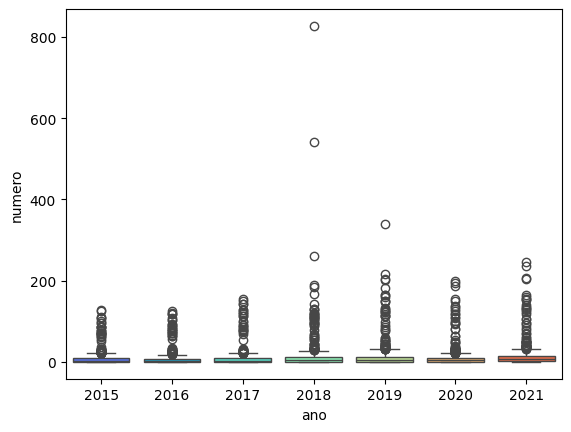

In [19]:
sns.boxplot(x=df['ano'], y=df['numero'], palette='rainbow')
plt.show()

In [34]:
df['numero'].unique()

array([  0,   1,   3,  11,   2,  15,   5,   4,  10,   6,   8,  16,  25,
        17,  21,  26,  29,  18,   7,  13,  31,  14,  12,  20,  23,  78,
        86,  85,  76,  72,  69,  62,  64,  68,  57,  52,  32,   9,  27,
        22,  24,  36,  28,  30,  96, 100, 107, 128, 111, 126, 109,  95,
        87,  19,  81,  80, 102,  70,  75,  65,  66,  71,  92,  79,  34,
       125, 117, 118, 120, 108,  93, 143, 151, 154, 119, 121, 123, 113,
        91,  98,  77,  73,  53,  43,  42, 131, 130, 184, 189, 260, 827,
        33,  35,  37, 129, 105, 115,  60,  39, 167, 541, 101,  94,  89,
        55, 132,  99, 112, 122,  90, 201,  48,  44,  59,  40, 165, 205,
       164, 147, 150, 159, 183, 216, 339,  45,  82,  38,  47, 155, 149,
       198, 186, 194, 137,  63,  97,  49, 134, 141,  84,  41,  61,  46,
        50, 207, 246, 236, 204, 156, 135, 124, 153])

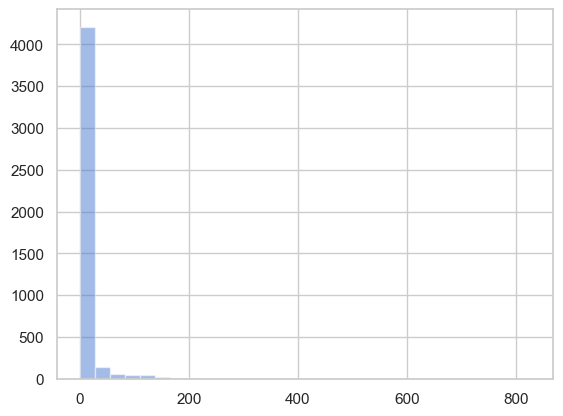

In [156]:
plt.hist(df['numero'], bins=30, alpha=0.5)
plt.show()

Alguns Insights:

1. Os bloxplot apontaram uma grande quantidade de outliers entre 20 a 180 casamentos para todo o dataframe, porém podem indicar que não são valores atípicos e sim uma alta dispersão. Além disso, por está analisando todo o dataframe, esses outliers (20 a 180) indicam que os dados são heterogêneos.

2. Valores acima de 180, podem ser considerado como atípicos, isso é importante para quando formos treinar o modelo de machine learning, pois teremos que remover esses outliers, o hitograma nos ajuda a verificar isso

### Análise Anual

In [46]:
df_year = df.groupby(['ano'])['numero'].agg(['sum', 'mean']).reset_index()
df_year['variacao%'] = df_year['sum'].pct_change()*100
df_year

,ano,sum,mean,variacao%
0,2015,5614,8.663580,NaN
1,2016,5354,8.262346,-4.631279
2,2017,5887,9.084877,9.955174
3,2018,9520,14.691358,61.712247
4,2019,9056,13.975309,-4.873950
5,2020,6433,9.927469,-28.964223
6,2021,9202,14.200617,43.043681


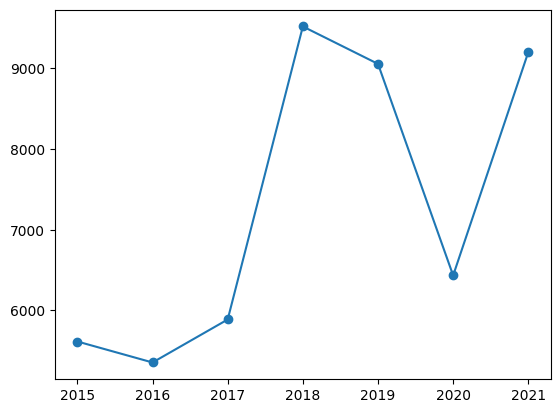

In [49]:
plt.plot(df_year['ano'], df_year['sum'], marker='o')
plt.show()

Alguns Insights:
1. É possível perceber um grande aumento nos casamentos homoafetivos em 2018.

2. 2018 e 2019 mantiveram próximo com uma variação de -4,87%

3. 2020 houve uma queda brusca de aproximadamente -29%, possivelmente devido a pandemia da covid-19.

4. Em 2021 a quantidade de casamentos voltaram a subir, ultrapassando 2019

5. A média de 2018, 2019 e 2021 superaram a média de casamento no período de 2015 a 2021

#### Análise Anual Por Gênero

In [80]:
df_year_gen = df.groupby(['genero', 'ano'])['numero'].agg(['sum', 'mean']).reset_index()
df_year_gen = df_year_gen.pivot_table(values=(['sum', 'mean']), index='ano', columns='genero', aggfunc='sum').reset_index()
df_year_gen.columns.names = [None, None]
df_year_gen.loc[:, ('sum', 'diferenca')] = df_year_gen['sum']['Feminino'] - df_year_gen['sum']['Masculino']
df_year_gen.loc[:, ('sum', 'Total')] = df_year_gen['sum']['Feminino'] + df_year_gen['sum']['Masculino']

df_year_gen

ano       mean                 sum                          
          Feminino  Masculino Feminino Masculino diferenca Total
0  2015   9.216049   8.111111     2986      2628       358  5614
1  2016   9.083333   7.441358     2943      2411       532  5354
2  2017  10.453704   7.716049     3387      2500       887  5887
3  2018  17.166667  12.216049     5562      3958      1604  9520
4  2019  16.509259  11.441358     5349      3707      1642  9056
5  2020  11.925926   7.929012     3864      2569      1295  6433
6  2021  17.290123  11.111111     5602      3600      2002  9202

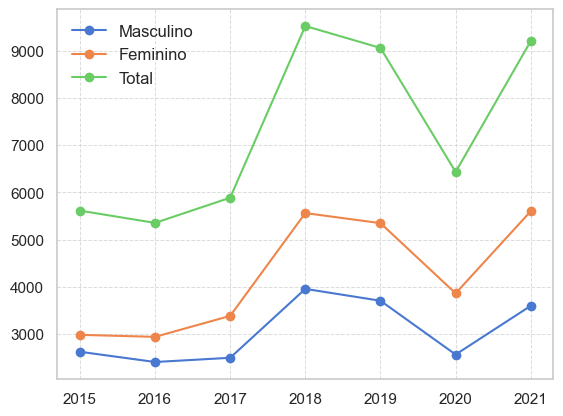

In [102]:
sns.set_palette('muted')
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Masculino'], marker='o', label='Masculino')
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Feminino'], marker='o', label='Feminino')
plt.plot(df_year_gen['ano'], df_year_gen['sum']['Total'], marker='o', label='Total')
plt.legend(loc='upper left', fontsize=12, frameon=False)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.show()

Alguns Insights:

1. A quantidade de casamentos Homoafetivos do sexo feminino é maior do que a quantidade de casamentos homoafeitovs do sexo masculino desde de 2015.

2. 2021 foi o ano que obteve a maior diferença, sendo de 2002

### Análise por Gênero

In [104]:
df_gen = df.groupby(['genero'])['numero'].agg(['sum', 'mean']).reset_index()
df_gen['%'] = (df_gen['sum'] / df_gen['sum'].sum()) * 100
df_gen

,genero,sum,mean,%
0,Feminino,29693,13.092152,58.14632
1,Masculino,21373,9.423721,41.85368


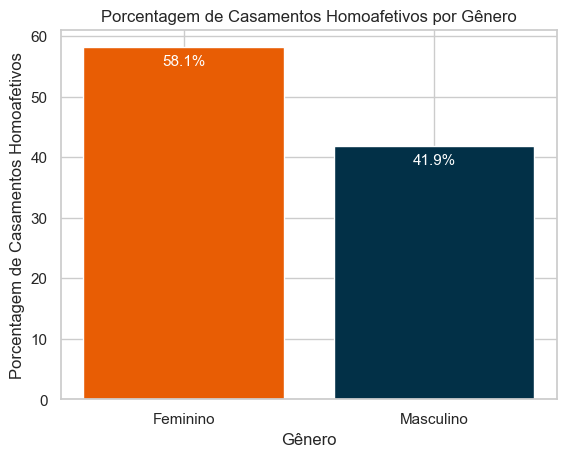

In [116]:
fig, ax = plt.subplots()

bars = ax.bar(df_gen['genero'], df_gen['%'], color=['#e85d04', '#023047'])


for bar in bars:
    height = bar.get_height() 
    ax.annotate('{:.1f}%'.format(height),
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, -10),
                textcoords="offset points",
                ha='center',
                va='center',
                fontsize=11,
                color='white')

ax.set_title('Porcentagem de Casamentos Homoafetivos por Gênero')
ax.set_xlabel('Gênero')
ax.set_ylabel('Porcentagem de Casamentos Homoafetivos')
plt.show()

Alguns Insights:

1. A quantidade de casamentos Homoafetivos do sexo feminino representa 58,1% enquando a masculina é de 41,9% desde de 2015.

### Análise Regional

In [121]:
df_region = df.groupby(['Região'])['numero'].agg(['sum', 'mean']).reset_index()
df_region.sort_values(by='sum', ascending=False)

,Região,sum,mean
3,Sudeste,29714,44.217262
1,Nordeste,8070,5.337302
4,Sul,7192,14.269841
0,Centro-Oeste,4192,6.238095
2,Norte,1898,1.613946


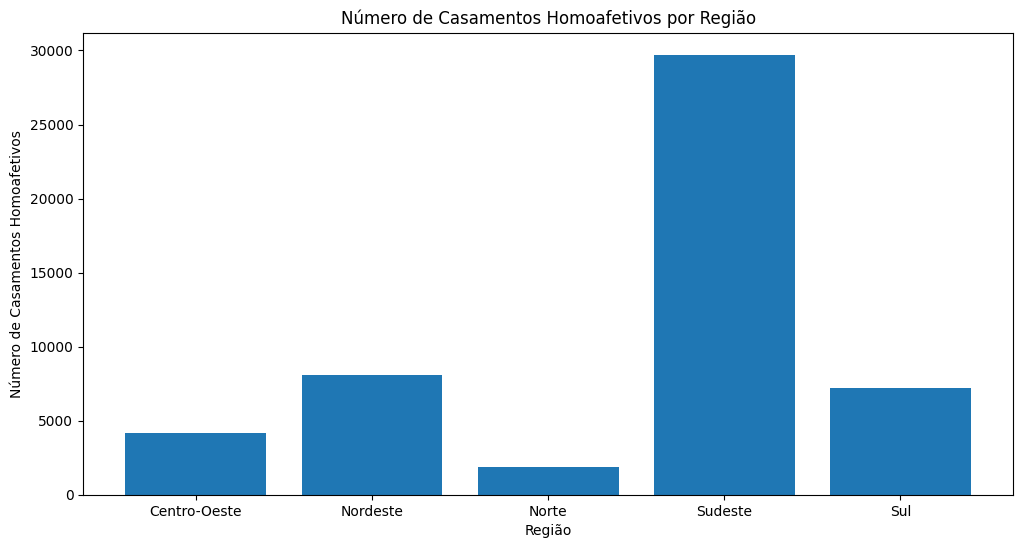

In [87]:
plt.figure(figsize=(12,6))
plt.bar(df_region['Região'], df_region['numero'])
plt.title('Número de Casamentos Homoafetivos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Casamentos Homoafetivos')

plt.show()

Alguns Insights:

1. As regiões com maiores números de casamento homoafetivos são: Sudeste, Nordeste e Sul.

2. Já as regiões com as maiores <b>médias</b> são: Sudeste, Sul e Centro-Oeste. 

Isso pode significar que na região Sul e Centro-Oeste obtiveram mais casamentos em seus estados, mas no total é inferior ao Nordeste

#### Análise Regional por Genêro

In [132]:
df_region_gen = df.groupby(['Região', 'genero'])['numero'].sum().unstack()
df_region_gen.columns.name = None
df_region_gen['Total'] = df_region_gen['Feminino'] + df_region_gen['Masculino']
df_region_gen.sort_values(by='Total', ascending=False)

,Feminino,Masculino,Total
Região,,,
Sudeste,17482,12232,29714
Nordeste,4981,3089,8070
Sul,3826,3366,7192
Centro-Oeste,2250,1942,4192
Norte,1154,744,1898


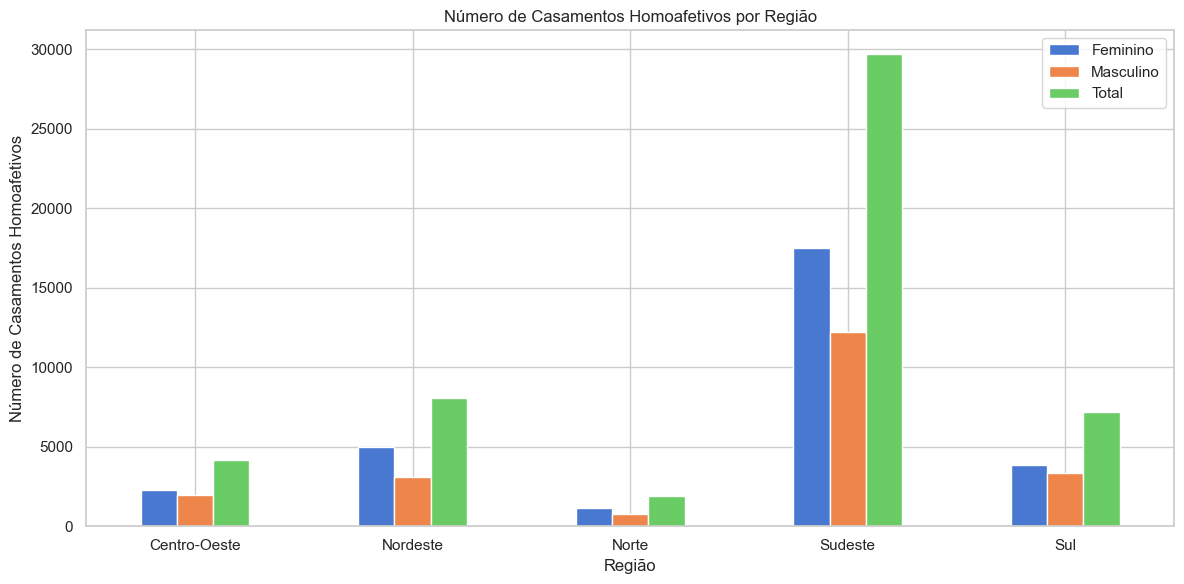

In [133]:
ax = df_region_gen.plot(kind='bar', figsize=(12,6))
plt.title('Número de Casamentos Homoafetivos por Região')
plt.xlabel('Região')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=360)
plt.tight_layout()
plt.show()

Alguns Insights:

1. A Quantidade de Casamentos Homoafetivos Feminino são maiores em todas a região do que o masculino

### Análise Estado 

In [139]:
df_uf = df.groupby(['uf'])['numero'].agg(['sum', 'mean']).reset_index()
df_uf = df_uf.sort_values(by='sum', ascending=False)
df_uf

,uf,sum,mean
25,São Paulo,20285,120.744048
20,Rio de Janeiro,4584,27.285714
12,Minas Gerais,4087,24.327381
23,Santa Catarina,2544,15.142857
13,Paraná,2500,14.880952
5,Ceará,2166,12.892857
19,Rio Grande do Sul,2148,12.785714
16,Pernambuco,1855,11.041667
4,Bahia,1531,9.113095
6,Distrito Federal,1378,8.202381


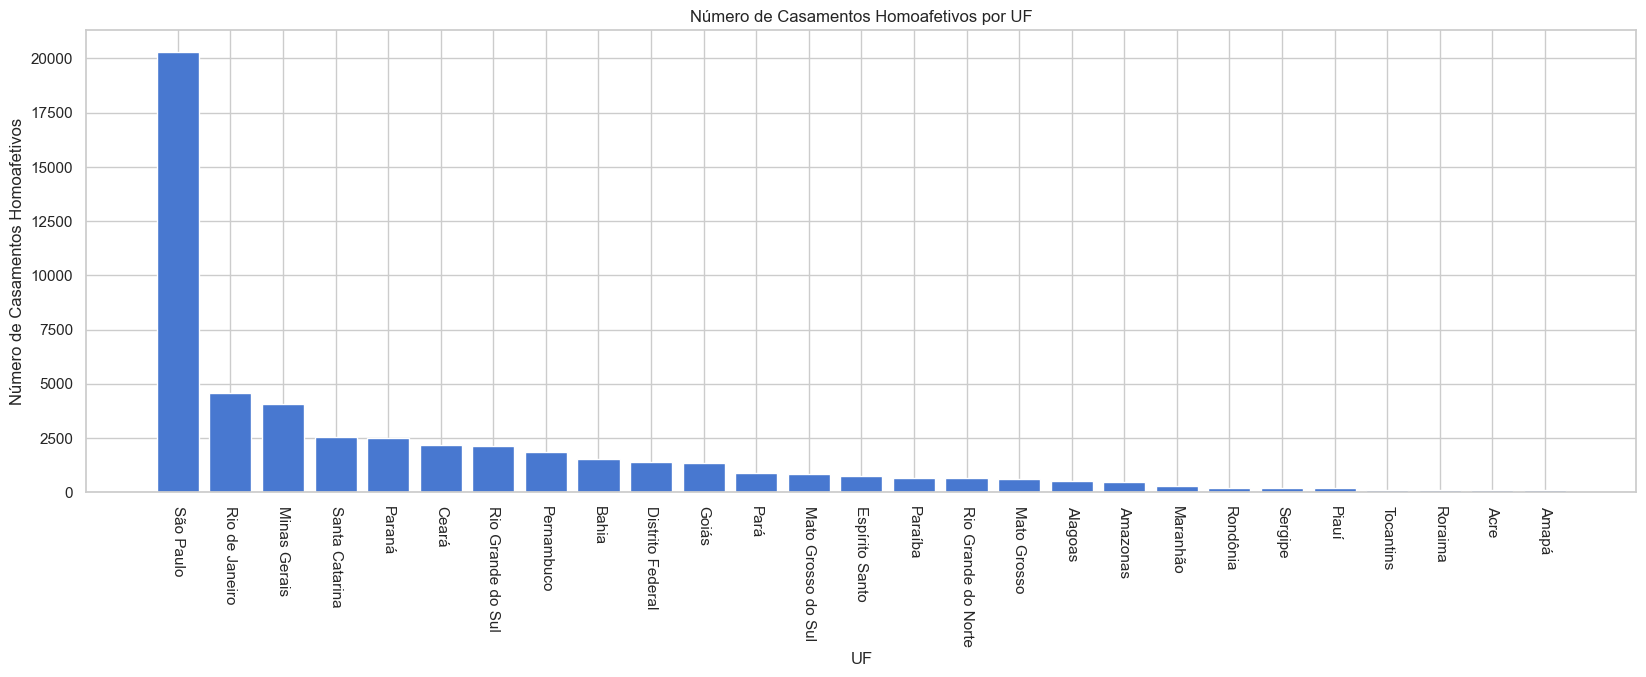

In [143]:
plt.figure(figsize=(20,6))
plt.bar(df_uf['uf'], df_uf['sum'])
plt.title('Número de Casamentos Homoafetivos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=270)

plt.show()

In [146]:
df_uf_gen = df.groupby(['uf', 'genero'])['numero'].sum().reset_index()
df_uf_gen = df_uf_gen.pivot_table(values='numero', index='uf', columns='genero', aggfunc='sum')
df_uf_gen.columns.name = None
df_uf_gen['diferenca'] = df_uf_gen['Feminino'] - df_uf_gen['Masculino']
df_uf_gen['Total'] = df_uf_gen['Feminino'] + df_uf_gen['Masculino']
df_uf_gen.sort_values(by='Total', ascending=False)

,Feminino,Masculino,diferenca,Total
uf,,,,
São Paulo,12083,8202,3881,20285
Rio de Janeiro,2667,1917,750,4584
Minas Gerais,2327,1760,567,4087
Santa Catarina,1175,1369,-194,2544
Paraná,1446,1054,392,2500
Ceará,1325,841,484,2166
Rio Grande do Sul,1205,943,262,2148
Pernambuco,1240,615,625,1855
Bahia,886,645,241,1531


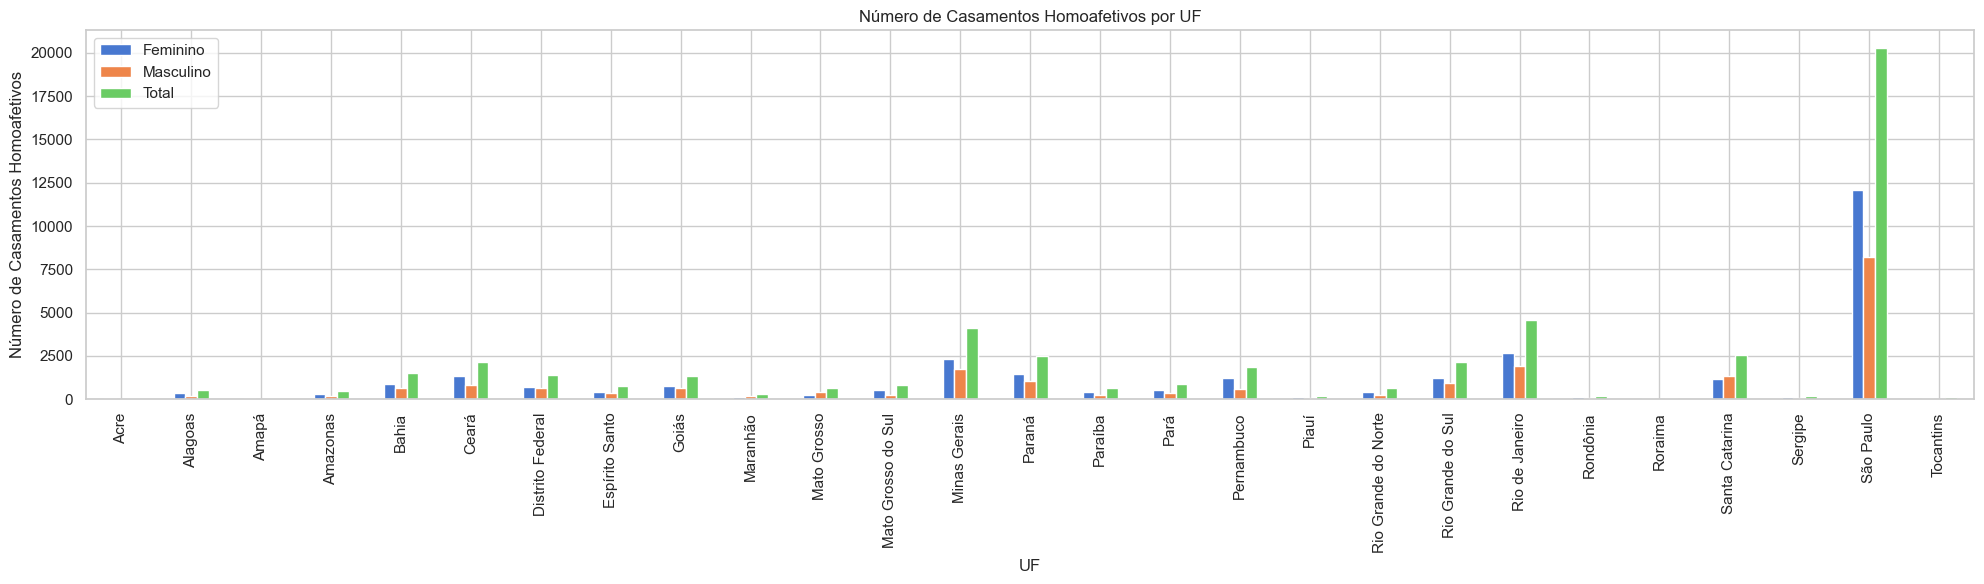

In [145]:
ax = df_uf_gen.plot(kind='bar', figsize=(20,6))
plt.title('Número de Casamentos Homoafetivos por UF')
plt.xlabel('UF')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Alguns Insights:

1. Os <b>estados com maiores casamentos homoafetivos</b> são: <b>São Paulo, Rio de Janeiro e Minas Gerais</b>. 

2. A Quantidade de Casamentos Homoafetivos <b>Masculino são maiores que o feminino</b> nos estados: <b>Santa Catarina, Mato Grosso e Maranhão</b>.

### Análise Por Mês

In [154]:
df_mes = df.groupby(['mes'])['numero'].agg(['sum', 'mean']).reset_index()
df_mes = df_mes.sort_values(by='sum', ascending=False)
df_mes

,mes,sum,mean
2,Dezembro,7716,20.412698
9,Novembro,5062,13.391534
10,Outubro,4689,12.404762
11,Setembro,4528,11.978836
4,Janeiro,4252,11.248677
5,Julho,3806,10.068783
3,Fevereiro,3753,9.928571
8,Março,3727,9.859788
1,Agosto,3566,9.433862
6,Junho,3519,9.309524


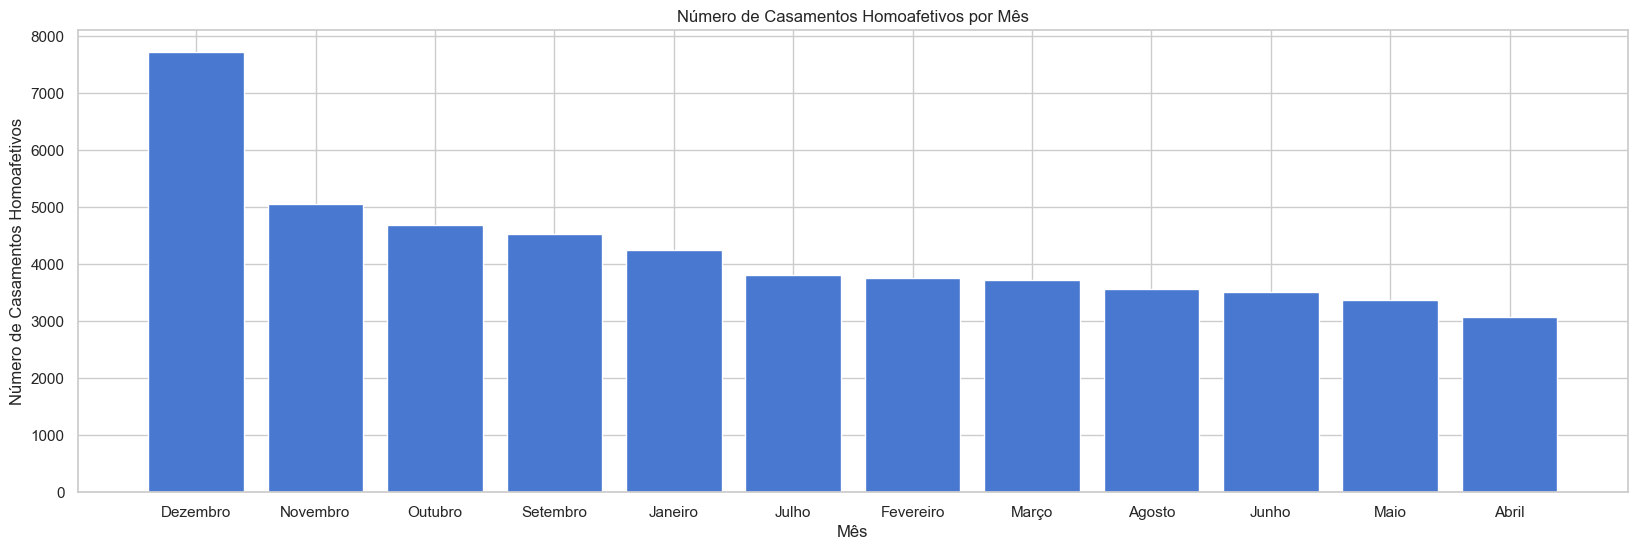

In [155]:
plt.figure(figsize=(20,6))
plt.bar(df_mes['mes'], df_mes['sum'])
plt.title('Número de Casamentos Homoafetivos por Mês')
plt.xlabel('Mês')
plt.ylabel('Número de Casamentos Homoafetivos')
plt.show()

Alguns Insights:

1. Os meses em que acontece a maior quantidade de casamentos homoafetivos são: Dezembro, Novembro e Outubro (os 3 últimos meses do ano)

---

### <b>Principais Insights</b>

- A média de casamentos entre 2015 e 2021, considerando todos os gêneros, foi de aproximadamente 11. Apesar de ser um número pequeno, o contexto social de aceitação ao longo do tempo possui grande influência para essa média.

- O boxplot apontou uma alta dispersão nos dados, com valores variando entre 20 e 180 casamentos. Isso sugere uma grande heterogeneidade nos dados, causada por diferenças regionais e populacionais. Porém, valores acima de 180 podem ser considerados atípicos, e deverão ser tratados para treinar um modelo de <i>machine learning</i>. Isso também pode ser observado no histograma.

- Em 2018, houve um aumento significativo no número de casamentos homoafetivos. Esse fato pode estar relacionado com o crescimento da aceitação pública, debates na mídia e eventos que trazem visibilidade para os direitos LGBTQIA+.

- No ano de 2020, houve uma queda acentuada de aproximadamente -29% no número de casamentos, provavelmente causada pela pandemia da COVID-19. As restrições sanitárias, distanciamento social e <i>lockdown</i> impactaram diretamente a realização das cerimônicas de casamento, fazendo com que muitos casais adiassem o evento, causando essa redução significativa.

- Em 2021, foi possível perceber uma recuperação nos números de casamentos, ultrapassando os valores de 2019. Uma possível causa para isso é a volta das cerimônias que haviam sido adiadas em 2020.

- Desde 2015, a quantidade de casamentos homoafetivos femininos se manteve maior do que a de casamentos masculinos, sendo 58,1% dos casamentos foram femininos, enquanto 41,9% foram masculinos, esse fato se repete para uma análise regional. Uma possível causa para isso é as mulheres estarem mais propensas a formalizar suas uniões. Em 2021, essa diferença foi de 2002 casamentos a mais entre mulheres, o maior valor entre 2015-2021.

- As regiões Sudeste, Nordeste e Sul lideram em números absolutos de casamentos homoafetivos. Porém, ao observar as médias, as regiões Sudeste, Sul e Centro-Oeste são as que se destacam. Embora o Nordeste tenha um número total alto, a distribuição de casamentos por estados no Sul e Centro-Oeste é mais homogênea, podendo indicar uma aceitação do contexto social ou politica nesses estados.

- Há apenas 3 estados onde os casamentos homoafetivos masculinos são mais frequentes: Santa Catarina, Mato Grosso e Maranhão. Esse dado pode ser reflexo de características culturais ou demográficas desses estados.

- Os <b>estados com os maiores números casamentos homoafetivos</b> são: <b>São Paulo, Rio de Janeiro e Minas Gerais</b>. Esses estados são mais populosos, economicamente desenvolvidos e possuem maior aceitação social dos direitos LGBTQIA+, influenciando positivamente os números.

- Os meses em que acontece a maior quantidade de casamentos homoafetivos são: Dezembro, Novembro e Outubro (os 3 últimos meses do ano)

- A maior parte dos casamentos homoafetivos ocorrem nos últimos 3 meses do anos, sendo Dezembro, Novembro e Outubro. Uma possível causa para isso é o clima mais favorável, recebimento de bônus ou 13° e férias de fim de ano.

---

# Previsão de Casamentos Homoafetivos